In [1]:
import pandas as pd
import numpy as np
import sage.all as sage
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as stats

In [9]:
data = pd.read_csv("data/sum-airport-month.csv",index_col=0)

In [11]:
data["arr_flights_n"] = data.arr_flights / data.arr_flights.max()

In [14]:
model = pd.read_csv("data/airport_x_months_intermediate.csv",index_col=0)

In [27]:
model

,Value,Std. Error,t value
(Intercept),-1.657104,0.016595,-99.853150
covid,-0.667595,0.009738,-68.552193
arr_flights_n,1.281444,0.094588,13.547612
top30,-0.363602,0.029260,-12.426596
ATL,-0.821634,0.100093,-8.208697
ADK,1.614085,0.113352,14.239634
ITO,-1.218287,0.089118,-13.670507
sep,-0.432904,0.022195,-19.504332
mar,-0.291111,0.017073,-17.051411
CDB,1.402034,0.134138,10.452196


In [65]:
controlData = data[data.control.eq(1)|data.covid.eq(1)]
controlData

,month,year,airport_name,airport,covid,control,extra_mon,extra_tue,extra_wed,extra_thu,...,LWS,SJC,GST,PIH,MIA,DAL,ELM,ABR,BNA,arr_flights_n
t,,,,,,,,,,,,,,,,,,,,,
178,3,2018,"Aberdeen, SD: Aberdeen Regional",ABR,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0.001621
178,3,2018,"Abilene, TX: Abilene Regional",ABI,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.003792
178,3,2018,"Adak Island, AK: Adak",ADK,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.000235
178,3,2018,"Aguadilla, PR: Rafael Hernandez",BQN,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.003792
178,3,2018,"Akron, OH: Akron-Canton Regional",CAK,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.016631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,7,2021,"Wilmington, NC: Wilmington International",ILM,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.016788
218,7,2021,"Wrangell, AK: Wrangell Airport",WRG,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.001621
218,7,2021,"Yakima, WA: Yakima Air Terminal/McAllister Field",YKM,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.001621


In [67]:
airportData = controlData.groupby([controlData.airport, controlData.airport_name, controlData.covid]).mean().reset_index()

In [68]:
def check_model(x):
    if x in model.index.to_list():
        return model.iloc[model.index.to_list().index(x)].Value
    else:
        return 0.0
airportData["coeff"] = airportData.airport.map(check_model)

In [69]:
coeff_flights = model.iloc[model.index.to_list().index("arr_flights_n")].Value

In [70]:
coeff_flights

1.2814442436055

In [71]:
coeff_top30 = model.iloc[model.index.to_list().index("top30")].Value

In [72]:
coeff_top30

-0.363602016670316

In [81]:
coeff_covid = model.iloc[model.index.to_list().index("covid")].Value
coeff_covid

-0.667595352984768

In [82]:
airportData["effect"] = airportData.arr_flights_n * coeff_flights + airportData.coeff + airportData.top30 * coeff_top30 + airportData.covid*coeff_covid
airportData["non-flights-effect"] = airportData.coeff + airportData.top30 * coeff_top30 + airportData.covid*coeff_covid
airportData["flights-effect"] = airportData.arr_flights_n * coeff_flights


In [83]:
effectData = airportData[["airport","airport_name","top30","covid","effect","non-flights-effect","flights-effect"]].sort_values(["covid","effect"])

In [84]:
effectData.to_excel("data/airport_effects.xlsx")

In [80]:
effectData

,airport,airport_name,top30,covid,effect,non-flights-effect,flights-effect
357,ITO,"Hilo, HI: Hilo International",0.0,0,-1.200572,-1.218287,0.017715
220,EKO,"Elko, NV: Elko Regional",0.0,0,-0.910741,-0.912590,0.001849
308,HIB,"Hibbing, MN: Range Regional",0.0,0,-0.822220,-0.823969,0.001748
107,BTM,"Butte, MT: Bert Mooney",0.0,0,-0.786029,-0.787923,0.001894
408,LIH,"Lihue, HI: Lihue Airport",0.0,0,-0.780152,-0.819948,0.039796
...,...,...,...,...,...,...,...
191,DEN,"Denver, CO: Denver International",1.0,1,0.233306,-0.363602,0.596908
193,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",1.0,1,0.300166,-0.363602,0.663768
100,BQN,"Aguadilla, PR: Rafael Hernandez",0.0,1,0.762871,0.757329,0.005543
125,CDB,"Cold Bay, AK: Cold Bay Airport",0.0,1,1.402601,1.402034,0.000567


In [86]:
airportData.groupby(airportData.covid).mean()

,month,year,control,extra_mon,extra_tue,extra_wed,extra_thu,extra_fri,extra_sat,extra_sun,...,MIA,DAL,ELM,ABR,BNA,arr_flights_n,coeff,effect,non-flights-effect,flights-effect
covid,,,,,,,,,,,,,,,,,,,,,
0,6.065126,2018.421375,1.0,0.354280,0.355132,0.356838,0.349355,0.351742,0.352102,0.353184,...,0.002778,0.002778,0.002778,0.002778,0.002778,0.044564,-0.021921,0.004886,-0.052221,0.057107
1,6.017129,2020.423349,0.0,0.356039,0.356981,0.349122,0.348945,0.353348,0.355836,0.354780,...,0.002681,0.002681,0.002681,0.002681,0.002681,0.027777,-0.017398,-0.678643,-0.714237,0.035594


In [90]:
model["abs. t"] = -model["t value"].abs()

In [93]:
model.sort_values(["abs. t"])[["Value","Std. Error","t value"]]

,Value,Std. Error,t value
(Intercept),-1.657104,0.016595,-99.853150
covid,-0.667595,0.009738,-68.552193
sep,-0.432904,0.022195,-19.504332
mar,-0.291111,0.017073,-17.051411
feb,0.410505,0.025104,16.352210
apr,-0.290176,0.017899,-16.212036
oct,-0.337773,0.022559,-14.972565
extra_sat,0.243063,0.016563,14.675234
ADK,1.614085,0.113352,14.239634
extra_tue,0.223808,0.016140,13.866420


In [96]:
airportData.groupby([airportData.covid,airportData.top30]).mean()["arr_flights_n"]

covid  top30
0      0.0      0.017459
       1.0      0.342729
1      0.0      0.011196
       1.0      0.217353
Name: arr_flights_n, dtype: float64

In [116]:
0.011/0.017, 0.217-0.342

(0.6470588235294117, -0.12500000000000003)

In [97]:
(0.342-0.017)*coeff_flights # difference between top30 and non top30 airports due toe

0.4164693791717875

In [117]:
-0.125*coeff_flights

-0.1601805304506875

In [121]:
(1+np.exp(.16+1.6))/(1+np.exp(.67+0.16+1.6))

0.551217929769404

<AxesSubplot:ylabel='Density'>

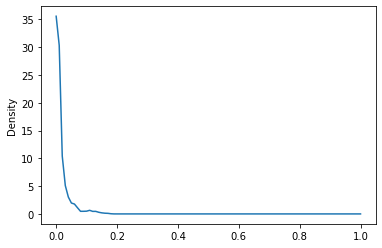

In [106]:
airportData[airportData.top30.eq(0)].arr_flights_n.plot.density(ind=[i/100. for i in range(101)])

<AxesSubplot:ylabel='Density'>

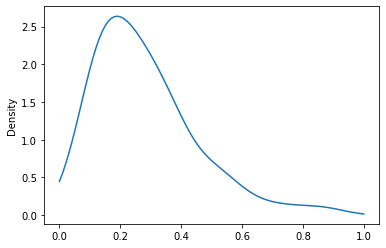

In [107]:

airportData[airportData.top30.eq(1)].arr_flights_n.plot.density(ind=[i/100. for i in range(101)])

In [111]:
airportData.arr_flights_n.max()

0.8642079566587755

<AxesSubplot:ylabel='Density'>

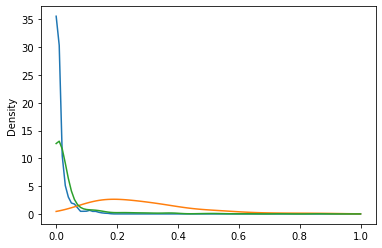

In [113]:
airportData[airportData.top30.eq(0)].arr_flights_n.plot.density(ind=[i/100. for i in range(101)])
airportData[airportData.top30.eq(1)].arr_flights_n.plot.density(ind=[i/100. for i in range(101)])
airportData.arr_flights_n.plot.density(ind=[i/100. for i in range(101)])

<AxesSubplot:ylabel='Density'>

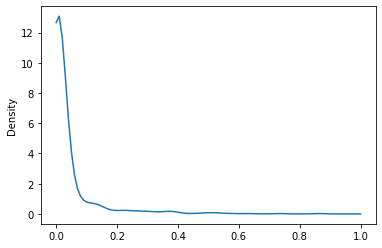

In [114]:
airportData.arr_flights_n.plot.density(ind=[i/100. for i in range(101)])

In [129]:
airportData[airportData.coeff != 0][airportData.top30.eq(0)][["airport","airport_name","coeff"]].sort_values("coeff")

/tmp/ipykernel_242895/4043493564.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  airportData[airportData.coeff != 0][airportData.top30.eq(0)][["airport","airport_name","coeff"]].sort_values("coeff")


,airport,airport_name,coeff
357,ITO,"Hilo, HI: Hilo International",-1.218287
358,ITO,"Hilo, HI: Hilo International",-1.218287
221,EKO,"Elko, NV: Elko Regional",-0.912590
220,EKO,"Elko, NV: Elko Regional",-0.912590
309,HIB,"Hibbing, MN: Range Regional",-0.823969
308,HIB,"Hibbing, MN: Range Regional",-0.823969
409,LIH,"Lihue, HI: Lihue Airport",-0.819948
408,LIH,"Lihue, HI: Lihue Airport",-0.819948
108,BTM,"Butte, MT: Bert Mooney",-0.787923
107,BTM,"Butte, MT: Bert Mooney",-0.787923
